Regression analysis is a form of predictive modelling technique 
which investigates the relationship between a dependent and independent variable

In [1]:
# Importing helpful package to load and hadle our data
import pandas as pd
import numpy as np
import math 

# import package for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# flexible and easy-to-use missing data visualizations
import missingno as msno

# Configure visualisations
# Below magic function make our plot outputs appear and be stored within the notebook. 
%matplotlib inline

# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

In [2]:
#  Get data
insurance_df = pd.read_csv('insurance.csv')
# Get glimpse of data
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Detail about each features:

1. age : Age of the insured

2. sex : Gender

3. bmi: Body mass index

4. children: Number of children

5. smoker: Indicator if you smoke

6. region: Region where the insured lives

7. charges: Secure prime

Here we have mix of 'Quantitative' and 'Categorical (also called qualitative)' features.

1. Quantitative  : age, bmi,children and charges
2. Categorical :  sex,smoker and region

In [3]:
# get info about dataset
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


Inference from above info. 
1. We have 0 null data
2. Total No. of rows: 1338 
3. Total No. of columns : 7

In [4]:
# Confirm null data
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

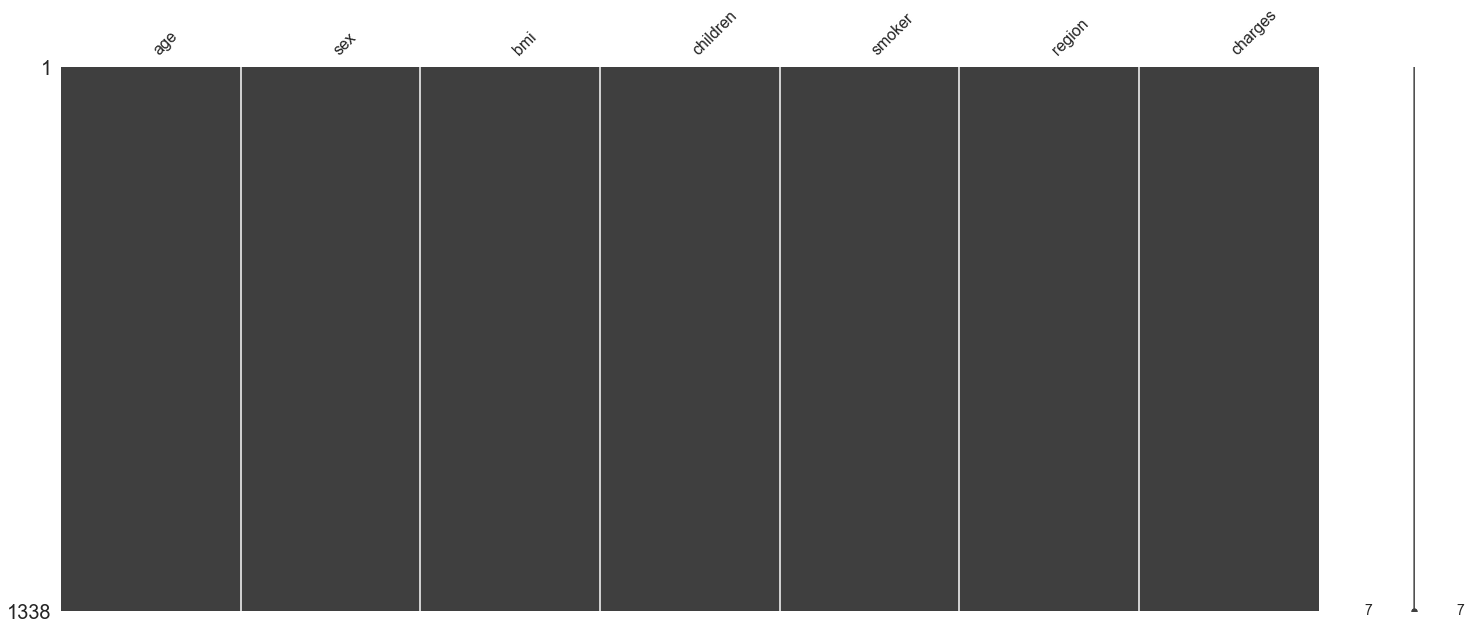

In [5]:
# Visualize missing data 
msno.matrix(insurance_df)
plt.show()
# nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion.

# Hence no null value, now we can do data visualization

In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


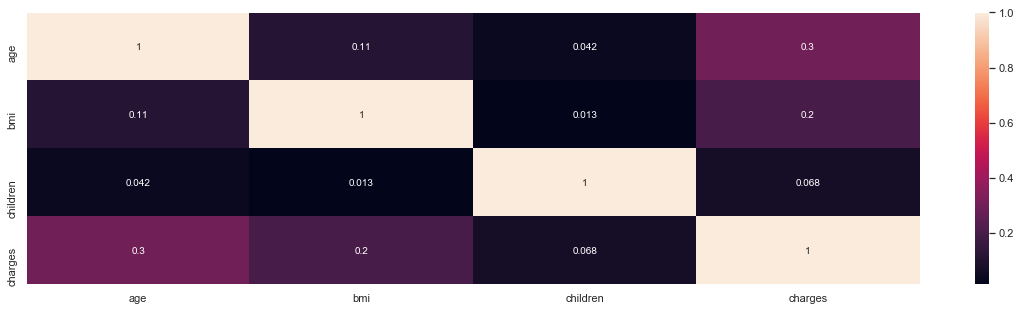

In [7]:
# Correlation between all features
# Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. 
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.heatmap(insurance_df.corr(),annot=True,ax=ax)
plt.show()

Conclusion:
1. charges has positive correlation with all features.
2. children has least correlation with charges.
3. age has maximum correlation with charges.

# Visualize each feature and its relation with Price

1. age

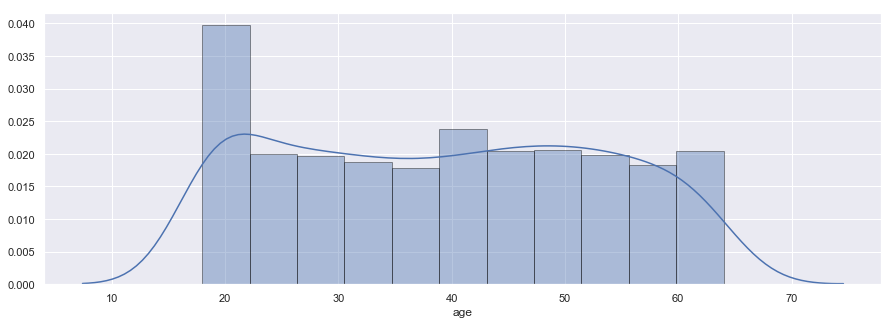

In [8]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(insurance_df['age'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()

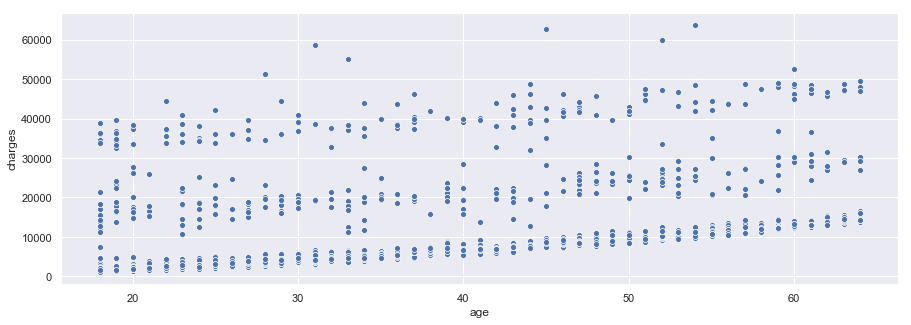

In [9]:
#  relation betwen age and charges
fig,ax = plt.subplots()
fig.set_size_inches(15,5) 
sns.scatterplot(x='age',y='charges',data=insurance_df)
plt.show()
# Show positive relation between age and charges

2. BMI

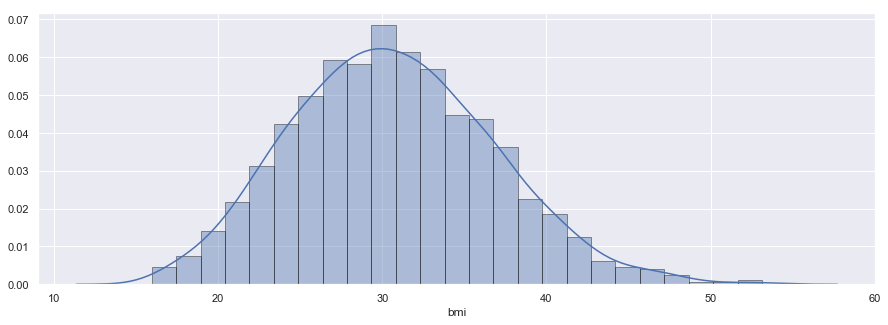

In [10]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(insurance_df['bmi'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()
# Almost a normal distribution

In [11]:
print("***Mean Median and Mode***")
print("Mean: {}".format(insurance_df['bmi'].mean()))
print("Median: {}".format(insurance_df['bmi'].median()))
print("Mode: {}".format(insurance_df['bmi'].mode()))

***Mean Median and Mode***
Mean: 30.663396860986538
Median: 30.4
Mode: 0    32.3
dtype: float64


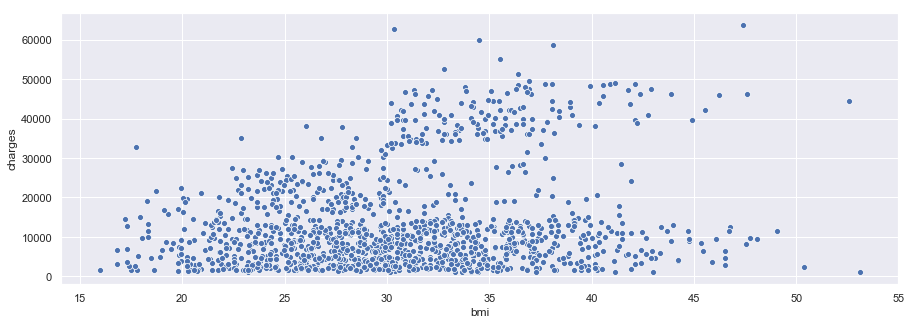

In [12]:
#  relation betwen age and charges
fig,ax = plt.subplots()
fig.set_size_inches(15,5) 
sns.scatterplot(x='bmi',y='charges',data=insurance_df)
plt.show()
# Show positive relation between bmi and charges

3. Children

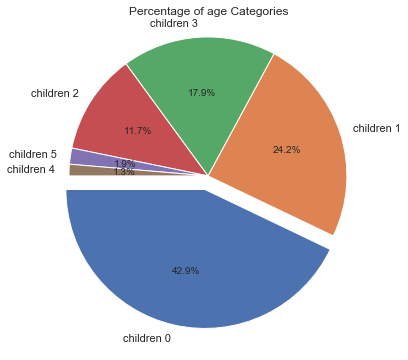

In [13]:
# fig,ax = plt.subplots()
# fig.set_size_inches(15,5)
# sns.distplot(insurance_df['children'],ax=ax,hist_kws={'edgecolor':'black'})
# plt.show()

get_children_count = insurance_df.children.unique().tolist()
labels =  [None] * len(get_children_count)
for idx,val in enumerate(get_children_count):
    labels[idx] = 'children '+ str(val)
sizes = insurance_df.children.value_counts().tolist()
explode = (0.1, 0, 0, 0, 0,0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.title("Percentage of age Categories")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

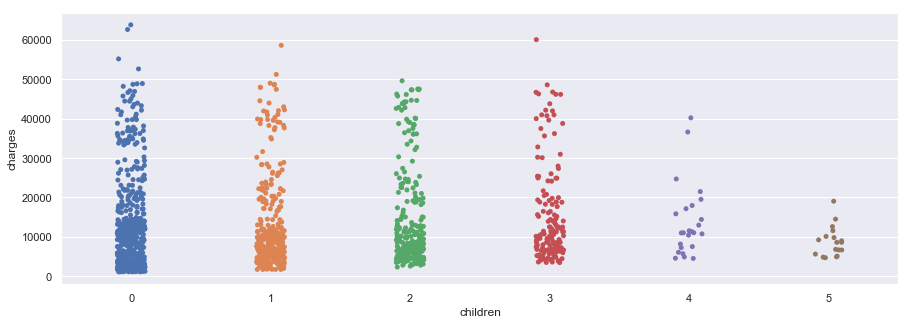

In [14]:
#  relation betwen children and charges
fig,ax = plt.subplots()
fig.set_size_inches(15,5) 
sns.stripplot(x='children',y='charges',data=insurance_df,jitter=True,ax=ax)
plt.show()
# Show positive relation between bmi and charges

4. sex

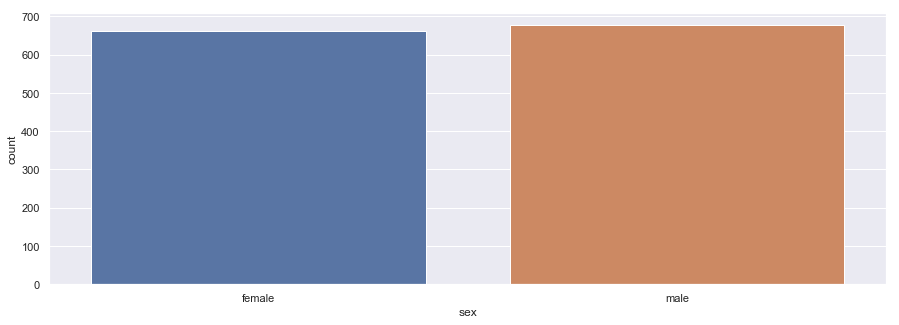

In [15]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.countplot(x='sex',data=insurance_df,ax=ax)
plt.show()

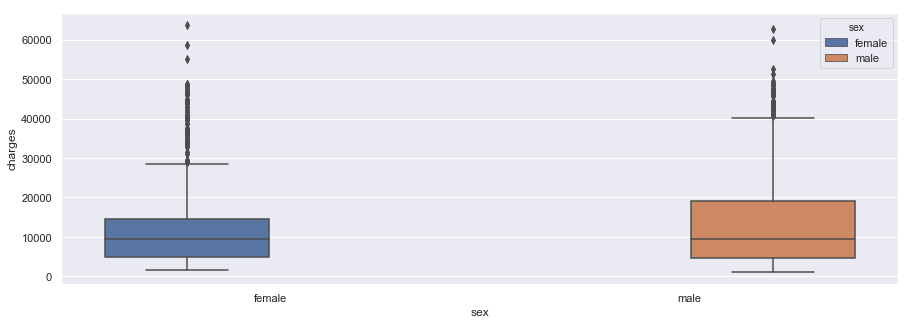

In [16]:
#  sex vs charges
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.boxplot(x='sex',y='charges', data=insurance_df,hue="sex",ax=ax)
# sns.swarmplot(x="sex", y="charges", data=insurance_df, hue="sex",ax=ax)
plt.show()

4. smoker

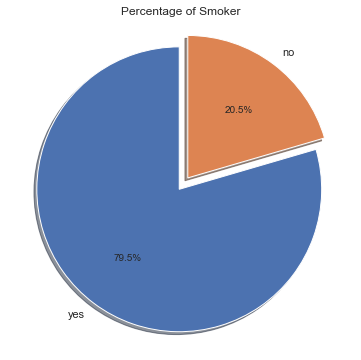

In [17]:
labels = insurance_df.smoker.unique().tolist()
sizes = insurance_df.smoker.value_counts().tolist()
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of Smoker")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

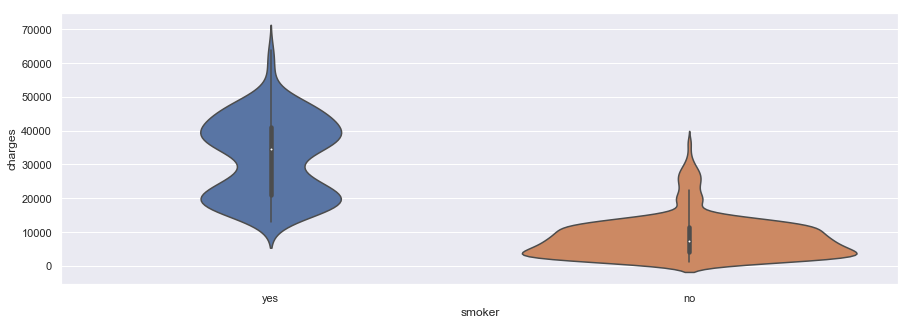

In [18]:
# smoker vs charges
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.violinplot(x="smoker", y="charges", data=insurance_df)
plt.show()

6.Regions

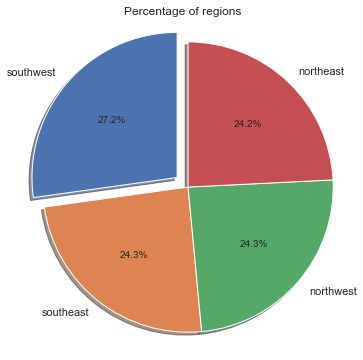

In [19]:
labels = insurance_df.region.unique().tolist()
sizes = insurance_df.region.value_counts().tolist()
explode = (0.1,0,0,0)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Percentage of regions")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

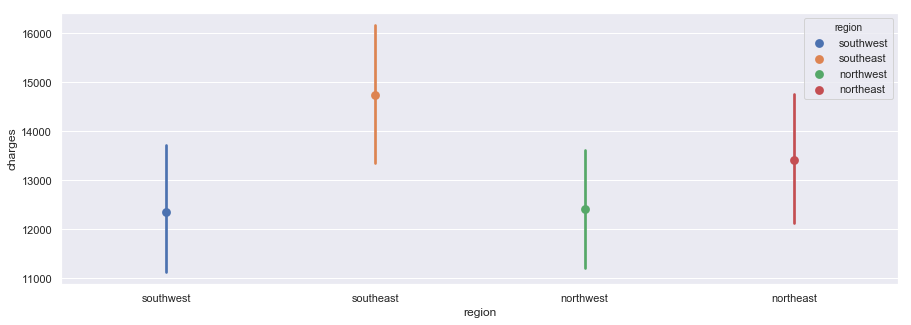

In [20]:
# regions vs charges
fig, ax = plt.subplots()
fig.set_size_inches(15,5)
sns.pointplot(x="region", y="charges", hue="region",data=insurance_df)
plt.show()

# one-hot encoding on categorical data.

In [25]:
ohe_insurance_data = pd.get_dummies(insurance_df)
cols = ohe_insurance_data.columns
insurance_clean_df = pd.DataFrame(ohe_insurance_data,columns=cols)
insurance_clean_df.sample(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
1306,29,21.850,0,16115.30450,1,0,0,1,1,0,0,0
215,41,37.100,2,7371.77200,1,0,1,0,0,0,0,1
1090,47,36.190,0,41676.08110,0,1,0,1,0,0,1,0
992,50,31.600,2,10118.42400,1,0,1,0,0,0,0,1
349,19,27.835,0,1635.73365,0,1,1,0,0,1,0,0


Scaling

The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [29]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
scaled_data = pd.DataFrame(sc_X.fit_transform(insurance_clean_df[['age','bmi','children']]),columns=['age','bmi','children'],
                          index = insurance_clean_df.index)

In [28]:
scaled_data.sample(5)

,age,bmi,children
452,-1.082758,-1.191520,-0.908614
1300,0.412467,-0.049771,-0.908614
685,0.982076,-0.697746,0.751079
555,-0.797954,-1.125902,0.751079
337,1.622887,-0.510736,-0.078767


In [31]:
insurance_scaled_df = insurance_clean_df.copy(deep=True)
insurance_scaled_df[['age','bmi','children']] = scaled_data[['age','bmi','children']]

In [32]:
insurance_scaled_df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,1,0,0,1,0,0,0,1
1,-1.509965,0.509621,-0.078767,1725.55230,0,1,1,0,0,0,1,0
2,-0.797954,0.383307,1.580926,4449.46200,0,1,1,0,0,0,1,0
3,-0.441948,-1.305531,-0.908614,21984.47061,0,1,1,0,0,1,0,0
4,-0.513149,-0.292556,-0.908614,3866.85520,0,1,1,0,0,1,0,0


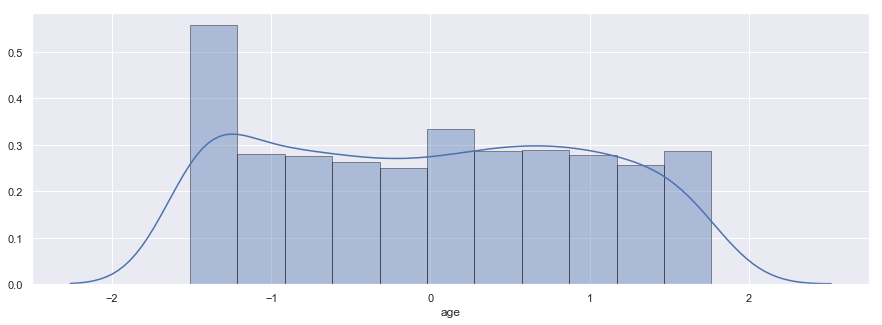

In [42]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(insurance_scaled_df['age'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()

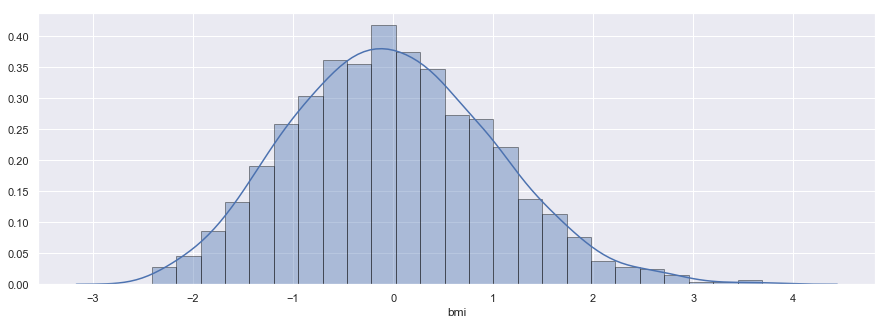

In [43]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(insurance_scaled_df['bmi'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()

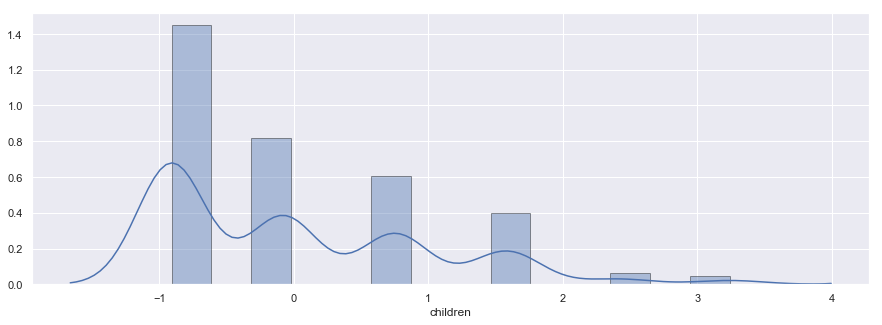

In [44]:
fig,ax = plt.subplots()
fig.set_size_inches(15,5)
sns.distplot(insurance_scaled_df['children'],ax=ax,hist_kws={'edgecolor':'black'})
plt.show()

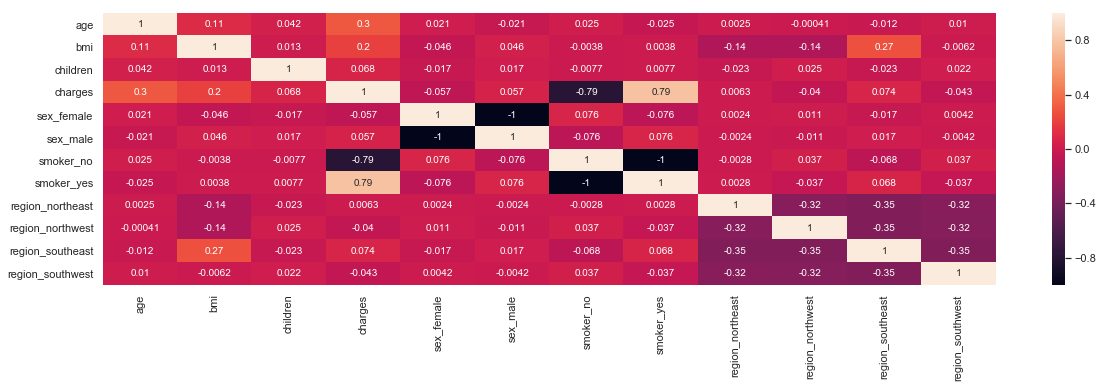

In [33]:
# Correlation between all features
# Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe.
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored. 
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.heatmap(insurance_scaled_df.corr(),annot=True,ax=ax)
plt.show()

Scaling has no neagtive impact of correlation between age,bmi and children wrt to chrages. Its same before and after scaling.

In [35]:
# Now separate our output-- Charges and input variables
x = insurance_scaled_df.drop(["charges"],axis=1)
y = insurance_scaled_df.charges

In [37]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state = 2,test_size=0.3)

# Model Training

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

regr = linear_model.LinearRegression()
regr.fit(train_x,train_y)
y_pred = regr.predict(test_x)

In [39]:
from sklearn.metrics import mean_absolute_error
print("accuracy: "+ str(regr.score(test_x,test_y)*100) + "%")
print("Mean absolute error: {}".format(mean_absolute_error(test_y,y_pred)))
print("Mean squared error: {}".format(mean_squared_error(test_y,y_pred)))
print("R2 score: {}".format(r2_score(test_y, y_pred)))
print('Coefficients: \n', regr.coef_)

accuracy: 76.42348545269874%
Mean absolute error: 4292.580187720704
Mean squared error: 38108732.48980027
R2 score: 0.7642348545269875
Coefficients: 
 [  3438.25884525   2087.212308      743.16448376     65.41891662
    -65.41891662 -11670.97579221  11670.97579221    667.48898422
     84.98958638   -101.63454791   -650.84402269]
